In [16]:
#Generate a fake Sienna dataset for testing purposes
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

#Set the random seed for reproducibility
np.random.seed(42)

In [17]:
sienna_data = pd.DataFrame()
#Make the 'Start' column random ages from 30 to 60
sienna_data['Start Age'] = np.random.randint(30, 61, 1000) + np.random.rand(1000)
#Make the 'End' column randomly between 1 and 7 years after the 'Start' date
sienna_data['End Age'] = sienna_data['Start Age'] + np.random.randint(1, 8, 1000) + np.random.rand(1000)
#Round both columns to 3 decimal places
sienna_data = sienna_data.round(3)
display(sienna_data.head())
#

,Start Age,End Age
0,36.381,41.904
1,49.970,55.257
2,58.842,65.635
3,44.838,48.416
4,40.469,43.103


In [18]:
#Create a model of PBVC
#https://www.desmos.com/calculator/b1tvyx7y71
def pbvc_model(age):
    age_from_0 = age - 30
    y = ((-2.1) / ((0.2) + (0.2 * np.e ** (-1 * (0.3*age_from_0 - 2.6))))) + 4.1
    return y

Text(0, 0.5, 'PBVC')

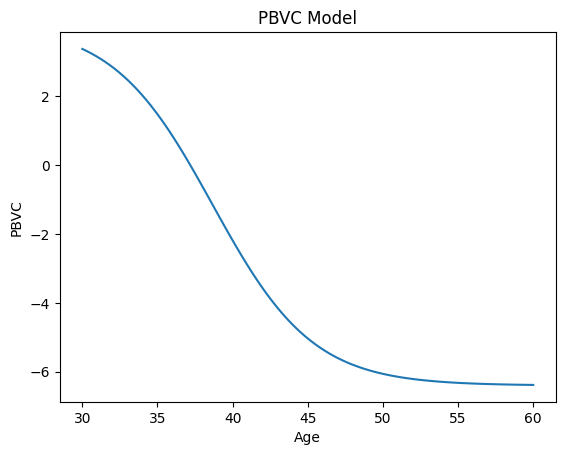

In [19]:
#Graph pvbc_model
ages = np.linspace(30, 60, 100)
pbvc = pbvc_model(ages)
plt.plot(ages, pbvc)
plt.title('PBVC Model')
plt.xlabel('Age')
plt.ylabel('PBVC')

In [20]:
#For each row in the dataframe, calculate random real number between the two ages and calculate the PBVC
sienna_data['PBVC'] = sienna_data.apply(lambda row: pbvc_model(np.random.uniform(row['Start Age'], row['End Age'])), axis=1)

In [21]:
display(sienna_data.head())

,Start Age,End Age,PBVC
0,36.381,41.904,-2.929385
1,49.970,55.257,-6.144193
2,58.842,65.635,-6.393732
3,44.838,48.416,-5.852449
4,40.469,43.103,-2.730198


In [22]:
#List number of positive and negative PBVC values
positive_pbvc = sienna_data[sienna_data['PBVC'] > 0]
negative_pbvc = sienna_data[sienna_data['PBVC'] < 0]
print(f'Positive PBVC: {len(positive_pbvc)}')
print(f'Negative PBVC: {len(negative_pbvc)}')


Positive PBVC: 166
Negative PBVC: 834


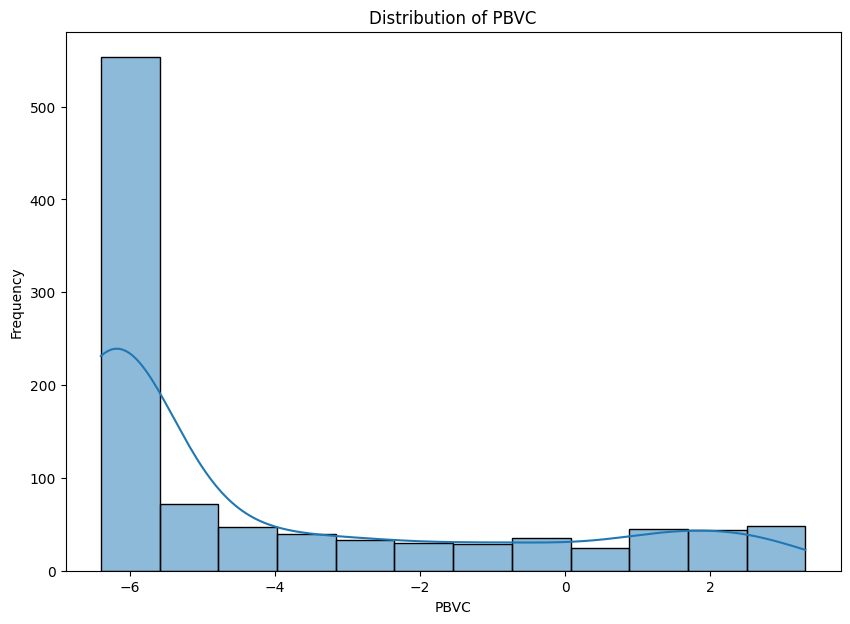

In [23]:
#Plot sienna_data
plt.figure(figsize=(10, 7))
sns.histplot(sienna_data['PBVC'], kde=True)
plt.title('Distribution of PBVC')
plt.xlabel('PBVC')
plt.ylabel('Frequency')
plt.show()


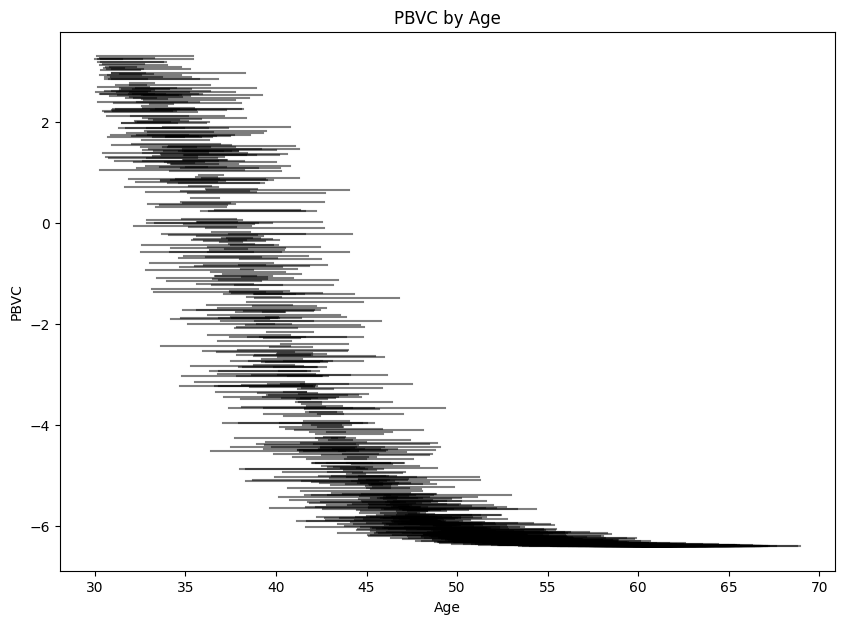

In [24]:
#Plot sienna_data
plt.figure(figsize=(10, 7))
for index, row in sienna_data.iterrows():
    plt.plot([row['Start Age'], row['End Age']], [row['PBVC'], row['PBVC']], color='black', alpha=0.5)
plt.title('PBVC by Age')
plt.xlabel('Age')
plt.ylabel('PBVC')
plt.show()

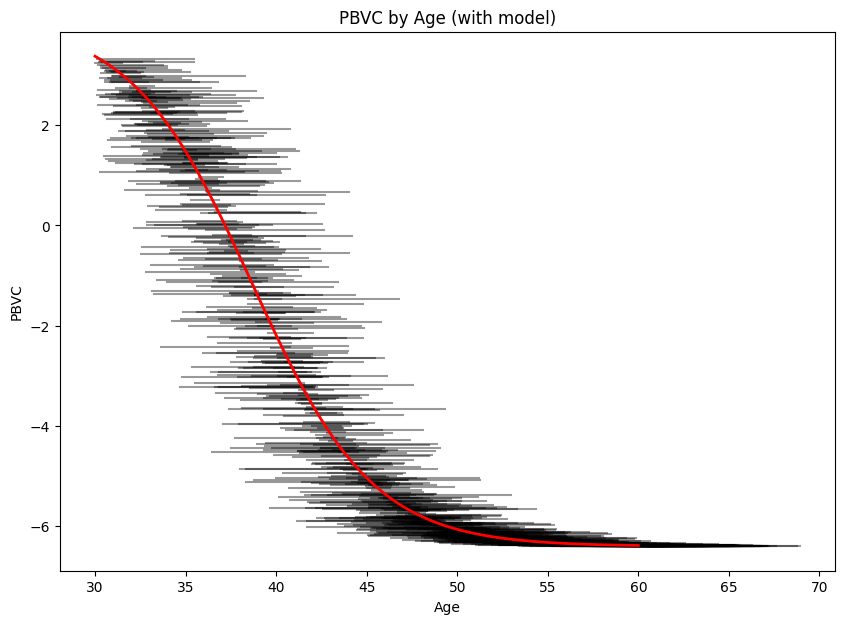

In [25]:
#Overlay the PBVC model on the plot
plt.figure(figsize=(10, 7))
for index, row in sienna_data.iterrows():
    plt.plot([row['Start Age'], row['End Age']], [row['PBVC'], row['PBVC']], color='black', alpha=0.4)
plt.plot(ages, pbvc, color='red', linewidth=2)
plt.title('PBVC by Age (with model)')
plt.xlabel('Age')
plt.ylabel('PBVC')
plt.show()
